In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# change this to point to wherever you've put the data
data_dir = "F:\\GoogleDrive\\ds_ml\\RIT\\2022-01 DSCI.644\\project\\phase2\\"
data_path = data_dir + "project3-authors.csv"
df_raw = pd.read_csv(data_path)
# df_raw.shape   # (17317, 9)
# df_raw.columns # ['Name', 'CommitId', 'RefactoringType', 'FilePath', 'Class',
#                   'RefactoringDetail', 'Message', 'AuthorName', 'AuthorEmail']
# df_raw['Name'].unique()  # ['hibernate$hibernate-validator', 'eclipse$bpmn2-modeler',
#                             'adangel$pmd']
df_raw.head()

,Name,CommitId,RefactoringType,FilePath,Class,RefactoringDetail,Message,AuthorName,AuthorEmail
0,hibernate$hibernate-validator,a3af1683e63c9c800f486552e7e5002c24b6712b,Move Source Folder,src,NaN,Move Source Folder\tsrc to hibernate-validator...,Moved the legacy validator code into hibernate...,Hardy Ferentschik,hibernate@ferentschik.de
1,hibernate$hibernate-validator,6d6c3deaf0b499e06077383d8d3add43f30ba099,Move Source Folder,hibernate-validator-legacy/src,NaN,Move Source Folder\thibernate-validator-legacy...,Refactored build so that compile and test can ...,Hardy Ferentschik,hibernate@ferentschik.de
2,hibernate$hibernate-validator,6d6c3deaf0b499e06077383d8d3add43f30ba099,Move Source Folder,hibernate-validator-legacy/src/test,NaN,Move Source Folder\thibernate-validator-legacy...,Refactored build so that compile and test can ...,Hardy Ferentschik,hibernate@ferentschik.de
3,hibernate$hibernate-validator,25350de39ef9484997999f6e6d8f00abc5d51546,Extract Variable,hibernate-validator/src/main/java/org/hibernat...,org.hibernate.validation.engine.ValidatorImpl,Extract Variable\tleafBeanInstance : Object in...,BVAL-37 ConstraintDescriptor.getLeafValue()\n\...,Emmanuel Bernard,emmanuel@hibernate.org
4,hibernate$hibernate-validator,25350de39ef9484997999f6e6d8f00abc5d51546,Rename Method,hibernate-validator/src/main/java/org/hibernat...,org.hibernate.validation.engine.ValidatorImpl,Rename Method\tpublic getBeanConstraints() : E...,BVAL-37 ConstraintDescriptor.getLeafValue()\n\...,Emmanuel Bernard,emmanuel@hibernate.org


In [10]:
df_raw.columns

Index(['Name', 'CommitId', 'RefactoringType', 'FilePath', 'Class',
       'RefactoringDetail', 'Message', 'AuthorName', 'AuthorEmail'],
      dtype='object')

In [11]:
# filter for just the adangel$pmd rows
df_adangle = df_raw[df_raw['Name'] == "adangel$pmd"]
# df_adangle.shape  # (8495, 9) same row count as reported in phase 1 report, check
df_adangle.tail()

,Name,CommitId,RefactoringType,FilePath,Class,RefactoringDetail,Message,AuthorName,AuthorEmail
17312,adangel$pmd,a5f131cc4cfe59a7da3cd220353c402d3c612d76,Rename Method,pmd-ui/src/main/java/net/sourceforge/pmd/util/...,net.sourceforge.pmd.util.fxdesigner.popups.Eve...,Rename Method\tprivate bindPopupToController()...,Fix caching logic\n,Clément Fournier,clement.fournier76@gmail.com
17313,adangel$pmd,5a2202319f90080e9980735a37e4eb8e948d2f0f,Extract Method,pmd-ui/src/main/java/net/sourceforge/pmd/util/...,net.sourceforge.pmd.util.fxdesigner.MainDesign...,Extract Method\tpublic onNodeItemSelected(sele...,Highlight name declarations when selecting fro...,Clément Fournier,clement.fournier76@gmail.com
17314,adangel$pmd,5a2202319f90080e9980735a37e4eb8e948d2f0f,Rename Parameter,pmd-ui/src/main/java/net/sourceforge/pmd/util/...,net.sourceforge.pmd.util.fxdesigner.NodeInfoPa...,Rename Parameter\tfocusScopeView : boolean to ...,Highlight name declarations when selecting fro...,Clément Fournier,clement.fournier76@gmail.com
17315,adangel$pmd,d43e65761ba7a58025977e9e8ed414f05e3058ce,Rename Class,pmd-core/src/test/java/net/sourceforge/pmd/lan...,net.sourceforge.pmd.lang.ast.xpath.AttributeAx...,Rename Class\tnet.sourceforge.pmd.lang.ast.xpa...,[core] Undo changes to AttributeAxisIterator /...,Andreas Dangel,andreas.dangel@adangel.org
17316,adangel$pmd,d43e65761ba7a58025977e9e8ed414f05e3058ce,Rename Method,pmd-core/src/test/java/net/sourceforge/pmd/lan...,net.sourceforge.pmd.lang.ast.xpath.AttributeAx...,Rename Method\tpublic testAttributeAxisIterato...,[core] Undo changes to AttributeAxisIterator /...,Andreas Dangel,andreas.dangel@adangel.org


In [12]:
df_adangle['RefactoringDetail'].iloc[8494]

'Rename Method\tpublic testAttributeAxisIteratorOnBean() : void renamed to public testAttributeAxisIteratorWithEnum() : void in class net.sourceforge.pmd.lang.ast.xpath.AttributeAxisIteratorTest'

In [13]:
df_adangle['FilePath'].iloc[8494]

'pmd-core/src/test/java/net/sourceforge/pmd/lang/ast/xpath/AttributeAxisIteratorTest.java'

In [14]:
df_adangle['Class'].iloc[8494]

'net.sourceforge.pmd.lang.ast.xpath.AttributeAxisIteratorTest'

In [15]:
# how many records do we lose if we drop rows with empty commit messages

# Feature Creation

## Potential Features

### Assumptions

`RefactoringDetail` appends `RefactoringType` with information that is in `FilePath` and/or `Class`.

Uniformative columns:

+ CommitId
+ Email

### Exploratory Questions

How many unique types of each variable? How are these variables distributed?

### 1 response, 3 inputs as follows

+ Authors - Response, 77 committers, may want to group by commit frequency as there are many of them
+ RefactoringTypes - 27 types
+ FilePath - How do we build a logical feature from this?
  - vector representation: cosine similarity should be higher among paths that share more path elements
  - e.g. if path 1 = a/b/c/d, path 2 = a/b/c/e, path 3 a/b/m/n then path 1 would have a higher cosine similarity to path 2 than to path 3.
+ Class - 3043 for these, so like `FilePath`, this one will need some engineering as well
  

In [16]:
# how are refactoring types distributed
refactor_types = df_adangle['RefactoringType'].value_counts()
# refactor_types.shape  # 27 types
refactor_types

Move Class                         1369
Rename Method                       967
Extract Method                      703
Rename Variable                     698
Rename Attribute                    688
Pull Up Method                      546
Move Method                         499
Rename Class                        467
Rename Parameter                    413
Move Attribute                      382
Extract Variable                    279
Push Down Method                    225
Extract And Move Method             195
Pull Up Attribute                   150
Extract Superclass                  122
Move And Rename Class               122
Inline Variable                     118
Inline Method                       103
Extract Class                        96
Change Package                       70
Parameterize Variable                65
Move Source Folder                   56
Push Down Attribute                  55
Replace Variable With Attribute      42
Extract Interface                    39


In [17]:
# how are file paths distributed
file_types = df_adangle['FilePath'].value_counts()
# file_types.shape  # 3139 types
file_types.head(10)

pmd-eclipse-plugin/plugins/net.sourceforge.pmd.eclipse.plugin/src/net/sourceforge/pmd/eclipse/ui/nls/StringKeys.java                     193
pmd-apex/src/main/java/net/sourceforge/pmd/lang/apex/ast/AbstractApexNode.java                                                            97
pmd/src/net/sourceforge/pmd/PMD.java                                                                                                      77
pmd/src/net/sourceforge/pmd/ast/JavaParser.java                                                                                           75
pmd/src/main/java/net/sourceforge/pmd/lang/plsql/ast/PLSQLParser.java                                                                     75
pmd-java/src/main/java/net/sourceforge/pmd/lang/java/typeresolution/ClassTypeResolver.java                                                61
pmd/src/net/sourceforge/pmd/swingui/PMDViewer.java                                                                                        58
pmd-java/src/

In [18]:
pd.options.display.max_rows = None
# how are authors distributed
authors = df_adangle['AuthorName'].value_counts()
# authors.shape  # 77 authors, may want to bucket e.g. group1, >=1000 commits, group2, >200 but <1000
authors # order of magnitude drop over the first 10

Tom Copeland                 1624
Ryan Gustafson               1157
Brian Remedios               1094
Andreas Dangel                886
Clément Fournier              700
oowekyala                     549
Xavier Le Vourch              323
Philippe Herlin               308
Don Leckie                    234
Freddy Mallet                 196
Juan Martín Sotuyo Dodero     177
Stuart Turton                 148
Allan Caplan                  145
Bendegúz Nagy                 143
Sergey                        104
Torsten Kleiber                94
Romain Pelisse                 80
Sven Jacob                     57
David Craine                   41
Dale Anson                     33
Victor Bucutea                 31
Sergey Gorbaty                 26
Ole-Martin Mork                26
gonzalo                        21
BBG                            20
Gunnlaugur Thor Briem          19
Romain PELISSE                 18
Robert Sösemann               16
Radim Kubacki                  15
David Renz    

Text(0, 0.5, 'Developer Count')

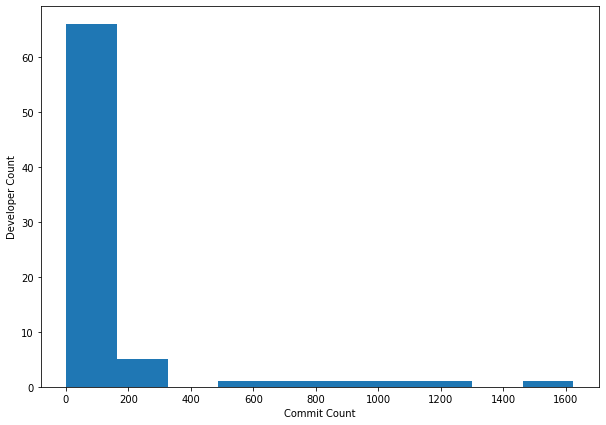

In [21]:
# histogram of committers
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(authors)
ax.set_xlabel('Commit Count')
ax.set_ylabel('Developer Count')

In [31]:
high_frequency_committers = authors[authors > 400]
high_frequency_committers.shape[0]

6

In [43]:
med_high_frequency_committers = authors[(authors > 100) & (authors <= 400)]
med_high_frequency_committers.shape[0]

9

In [45]:
med_frequency_committers = authors[(authors > 25) & (authors <= 100)]
med_frequency_committers.shape[0]

8

In [46]:
low_frequency_committers = authors[authors <= 25]
low_frequency_committers.shape[0]

54

(array([58.,  2.,  2.,  1.,  3.,  1.,  1.,  1.,  0.,  2.]),
 array([  1. ,  33.2,  65.4,  97.6, 129.8, 162. , 194.2, 226.4, 258.6,
        290.8, 323. ]),
 <BarContainer object of 10 artists>)

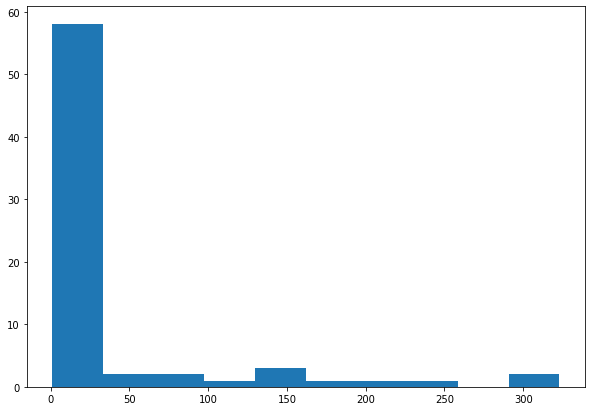

In [24]:
less_frequent_committers = authors[authors < 400]  # less_frequent_committers.shape = 71
fig2, ax2 = plt.subplots(figsize = (10, 7))
ax2.hist(less_frequent_committers)  # turtles all the way down  ;-)

(array([34.,  3.,  6.,  7.,  3.,  1.,  2.,  1.,  1.,  1.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29., 33., 37., 41.]),
 <BarContainer object of 10 artists>)

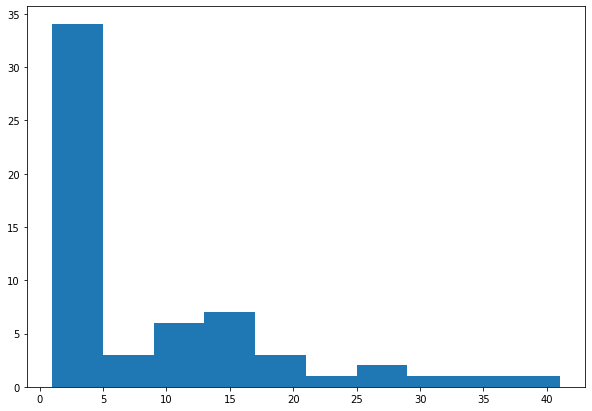

In [27]:
least_frequent_committers = authors[authors < 50]  # least_frequent_committers.shape = 59
fig3, ax3 = plt.subplots(figsize = (10, 7))
ax3.hist(least_frequent_committers)

In [48]:
# committer buckets
high_frequency_committers.shape[0], med_high_frequency_committers.shape[0], med_frequency_committers.shape[0], low_frequency_committers.shape[0]

(6, 9, 8, 54)

## The right research question

Assumption - The high and medium high frequency committers can probably refactor request well.  The goal should be best utilize the medium and low frequency committers to off-load the higher frequency committers.

In [19]:
# how are classes distributed
classes = df_adangle['Class'].value_counts()
# classes.shape  # 3043
# type(classes)  # pandas.core.series.Series
classes.head(10)

net.sourceforge.pmd.eclipse.ui.nls.StringKeys                     193
net.sourceforge.pmd.lang.apex.ast.AbstractApexNode                 97
net.sourceforge.pmd.PMD                                            86
net.sourceforge.pmd.lang.plsql.ast.PLSQLParser                     75
net.sourceforge.pmd.ast.JavaParser                                 75
net.sourceforge.pmd.lang.java.typeresolution.ClassTypeResolver     65
net.sourceforge.pmd.RuleSetFactory                                 59
net.sourceforge.pmd.lang.java.ast.JavaQualifiedName                57
net.sourceforge.pmd.swingui.PMDViewer                              52
net.sourceforge.pmd.eclipse.PMDPlugin                              51
Name: Class, dtype: int64

### Other data particulars

+ There are multiple rows with the same CommitId so this field can not be used to identify unique rows in the data.
+ Are there repeated rows?
  - No, see below.
+ what is the size of the vocabulary used in the `Message` column

In [ ]:
## replace_with_space takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def replace_with_space(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

In [ ]:
import string  # to get access to punctuation chars

# df_filtered.shape  # (8495, 9)
# df_filtered.drop_duplicates(inplace=False)
# df_filtered.shape  # (8495, 9) no change
messages_raw = df_filtered['Message']
# messages_raw.shape

## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [replace_with_space(x, digits) for x in messages_raw]
## Remove punctuation
punc_less = [replace_with_space(x, list(string.punctuation)) for x in digit_less]
punc_less[0:5]  # lots empty/junky messages

In [ ]:
## clear messages that start with "    empty log message"
empty_log = 'empty log message'
clear_empty = ['' if x.__contains__(empty_log) else x for x in punc_less]
clear_empty[100:150]